# Import Libraries & Load Datasets

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load libraries/packages
import os
import warnings
import pandas as pd
import numpy as np
from datetime import datetime

# Package for visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Package for cleaning, modelling, and model evaluation 
from scipy.stats import shapiro
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

from google.colab import files

### Load dataset (Train, Test dan Sample Submission)

In [79]:
# Load train,test, and sample submission dataset
df_train = pd.read_csv("/content/drive/MyDrive/PROGATE/Dataset Rakamin/Homecreditintern/HCI Final Project/TRAIN.csv")
print("Size of train:", df_train.shape)
df_test = pd.read_csv("/content/drive/MyDrive/PROGATE/Dataset Rakamin/Homecreditintern/HCI Final Project/TEST.csv")
print("Size of test:", df_test.shape)
df_ss = pd.read_csv("/content/drive/MyDrive/PROGATE/Dataset Rakamin/Homecreditintern/HCI Final Project/sample_submission.csv")
print("Size of sample_submission:", df_ss.shape)

Size of train: (307511, 26)
Size of test: (48744, 25)
Size of sample_submission: (48744, 2)


In [80]:
#Concat train dan test data
df = pd.concat([df_train, df_test])
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,LENGTH_OF_WORK(YEARS),NAME_CONTRACT_STATUS_PREV,HAVING_ACTIVE_CREDIT
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,0,0.083037,0.262949,0.139376,-1134.0,25.9,1.7,Approved,Y
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,0,0.311267,0.622246,NaN,-828.0,45.9,3.3,Approved,Y
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,0,NaN,0.555912,0.729567,-815.0,52.1,0.6,Approved,Y
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,0,NaN,0.650442,NaN,-617.0,52.0,8.3,Refused,Y
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,1,NaN,0.322738,NaN,-1106.0,54.6,8.3,Approved,Y


# Data Preprocessing

In [81]:
# Show info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   356255 non-null  int64  
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           356255 non-null  object 
 3   CODE_GENDER                  356255 non-null  object 
 4   FLAG_OWN_CAR                 356255 non-null  object 
 5   FLAG_OWN_REALTY              356255 non-null  object 
 6   CNT_CHILDREN                 356255 non-null  int64  
 7   AMT_INCOME_TOTAL             356255 non-null  float64
 8   AMT_CREDIT                   356255 non-null  float64
 9   AMT_ANNUITY                  356219 non-null  float64
 10  NAME_INCOME_TYPE             356255 non-null  object 
 11  NAME_EDUCATION_TYPE          356255 non-null  object 
 12  NAME_FAMILY_STATUS           356255 non-null  object 
 13  

In [82]:
# Check statistical value for numeric data
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,LENGTH_OF_WORK(YEARS)
count,356255.000000,307511.000000,356255.000000,3.562550e+05,3.562550e+05,356219.000000,356255.000000,356255.000000,356255.000000,356255.000000,162345.000000,3.555870e+05,286622.000000,356254.000000,356255.000000,356255.000000
mean,278128.000000,0.080729,0.414316,1.701161e+05,5.877674e+05,27425.560657,-3002.071163,2.050506,2.028932,0.229661,0.501965,5.148900e-01,0.509350,-978.580852,43.918600,186.836546
std,102842.104413,0.272419,0.720378,2.235068e+05,3.986237e+05,14732.808190,1517.901735,0.510947,0.504586,0.420616,0.210045,1.897531e-01,0.194141,835.063902,11.933801,382.918688
min,100001.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,-7197.000000,1.000000,-1.000000,0.000000,0.013458,8.173617e-08,0.000527,-4361.000000,20.100000,0.000000
25%,189064.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16731.000000,-4318.000000,2.000000,2.000000,0.000000,0.335503,3.949551e-01,0.368969,-1592.000000,34.000000,2.600000
50%,278128.000000,0.000000,0.000000,1.530000e+05,5.002110e+05,25078.500000,-3252.000000,2.000000,2.000000,0.000000,0.506155,5.648491e-01,0.533482,-771.000000,43.100000,6.100000
75%,367191.500000,0.000000,1.000000,2.025000e+05,7.975575e+05,34960.500000,-1717.000000,2.000000,2.000000,0.000000,0.673344,6.629285e-01,0.665855,-286.000000,53.900000,15.800000
max,456255.000000,1.000000,20.000000,1.170000e+08,4.050000e+06,258025.500000,0.000000,3.000000,3.000000,1.000000,0.962693,8.549997e-01,0.896010,0.000000,69.100000,1000.000000


In [83]:
# Check missing value for each column
df.isnull().sum()

SK_ID_CURR                          0
TARGET                          48744
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        36
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
DAYS_ID_PUBLISH                     0
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
REG_CITY_NOT_WORK_CITY              0
EXT_SOURCE_1                   193910
EXT_SOURCE_2                      668
EXT_SOURCE_3                    69633
DAYS_LAST_PHONE_CHANGE              1
AGE                                 0
LENGTH_OF_WORK(YEARS)               0
NAME_CONTRACT_STATUS_PREV       17398
HAVING_ACTIVE_CREDIT                0
dtype: int64

In [84]:
#fill the missing value of categorical data with mode
df['NAME_CONTRACT_STATUS_PREV'] = df['NAME_CONTRACT_STATUS_PREV'].fillna(df['NAME_CONTRACT_STATUS_PREV'].mode()[0])

In [85]:
#fill the missing value of numerical data with mean
df['EXT_SOURCE_1'] = df['EXT_SOURCE_1'].fillna(df['EXT_SOURCE_1'].mean())
df['EXT_SOURCE_2'] = df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean())
df['EXT_SOURCE_3'] = df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean())
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mean())
df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean())

In [86]:
# Recheck missing value for each column
df.isnull().sum()

SK_ID_CURR                         0
TARGET                         48744
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_ID_PUBLISH                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_CITY_NOT_WORK_CITY             0
EXT_SOURCE_1                       0
EXT_SOURCE_2                       0
EXT_SOURCE_3                       0
DAYS_LAST_PHONE_CHANGE             0
AGE                                0
LENGTH_OF_WORK(YEARS)              0
NAME_CONTRACT_STATUS_PREV          0
HAVING_ACTIVE_CREDIT               0
dtype: int64

In [87]:
# Check duplicates data
Duplicates = df[df.duplicated()]
Duplicates

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,LENGTH_OF_WORK(YEARS),NAME_CONTRACT_STATUS_PREV,HAVING_ACTIVE_CREDIT


In [88]:
# Add new column as Age Group
df.loc[((df['AGE']>20) & (df['AGE']<=30)) ,'AGE_GROUP'] = 'Above Twenty'
df.loc[((df['AGE']>30) & (df['AGE']<=40)) ,'AGE_GROUP'] = 'Above Thirty'
df.loc[((df['AGE']>40) & (df['AGE']<=50)) ,'AGE_GROUP'] = 'Above Fourty'
df.loc[((df['AGE']>50) & (df['AGE']<=60)) ,'AGE_GROUP'] = 'Above Fifty'
df.loc[((df['AGE']>60) & (df['AGE']<=70)) ,'AGE_GROUP'] = 'Above Sixty'
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,LENGTH_OF_WORK(YEARS),NAME_CONTRACT_STATUS_PREV,HAVING_ACTIVE_CREDIT,AGE_GROUP
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.083037,0.262949,0.139376,-1134.0,25.9,1.7,Approved,Y,Above Twenty
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.311267,0.622246,0.509350,-828.0,45.9,3.3,Approved,Y,Above Fourty
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.501965,0.555912,0.729567,-815.0,52.1,0.6,Approved,Y,Above Fifty
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0.501965,0.650442,0.509350,-617.0,52.0,8.3,Refused,Y,Above Fifty
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,0.501965,0.322738,0.509350,-1106.0,54.6,8.3,Approved,Y,Above Fifty


# Exploratory Data Analysis

In [89]:
# Split data into train and test data
new_train = df.iloc[:307511]
print('Size of train data:', new_train.shape)
new_test = df.iloc[307511:]
print('Size of test data:', new_test.shape)

Size of train data: (307511, 27)
Size of test data: (48744, 27)


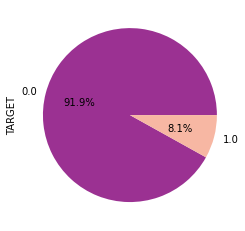

In [90]:
# The ratio of label/class
mycolors=['#9B3192','#F7B7A3']
new_train['TARGET'].value_counts().plot.pie(autopct='%1.1f%%',colors=mycolors)
plt.show()

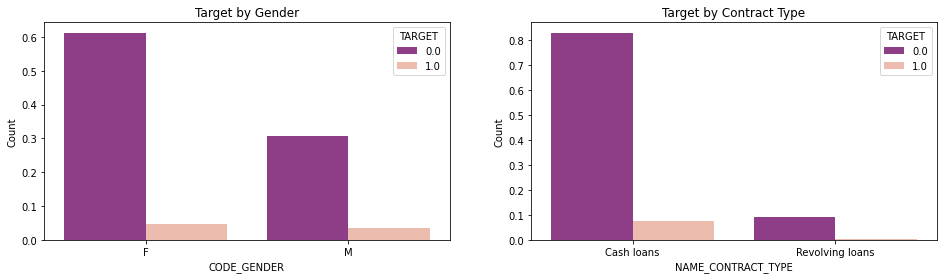

In [91]:
# categorical data visualization
fig, axis = plt.subplots(1, 2, figsize=(16,4))
axis[0].set_title("Target by Gender")
axis[1].set_title("Target by Contract Type")
axis_y = "Count"

# Plot Gender
gender_group = new_train.groupby('CODE_GENDER')["TARGET"].value_counts()/len(new_train)
gender_group = gender_group.to_frame().rename({"TARGET": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='CODE_GENDER', y= axis_y, hue='TARGET', data=gender_group, palette= ['#9B3192','#F7B7A3'], ax=axis[0])

# Plot Contract Type
contract_type_group = new_train.groupby('NAME_CONTRACT_TYPE')["TARGET"].value_counts()/len(new_train)
contract_type_group = contract_type_group.to_frame().rename({"TARGET": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='NAME_CONTRACT_TYPE', y= axis_y, hue='TARGET', data=contract_type_group, palette= ['#9B3192','#F7B7A3'], ax=axis[1])


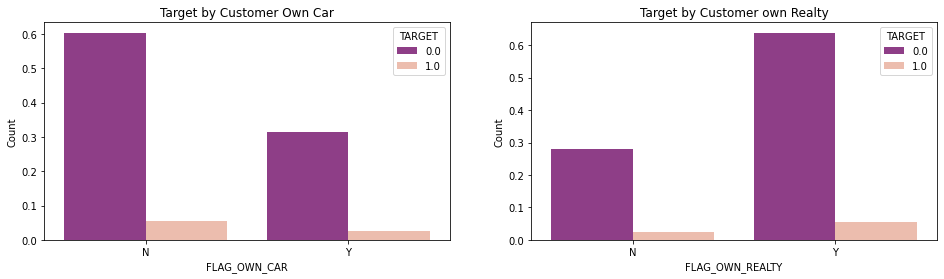

In [92]:
#categorical data visualization
fig, axis = plt.subplots(1, 2, figsize=(16,4))
axis[0].set_title("Target by Customer Own Car")
axis[1].set_title("Target by Customer own Realty")
axis_y = "Count"

# Plot Customer Own Car
customer_own_car_group = new_train.groupby('FLAG_OWN_CAR')["TARGET"].value_counts()/len(new_train)
customer_own_car_group = customer_own_car_group.to_frame().rename({"TARGET": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='FLAG_OWN_CAR', y= axis_y, hue='TARGET', data=customer_own_car_group, palette= ['#9B3192','#F7B7A3'], ax=axis[0])

# Plot Customer Own Realty
customer_own_realty_group = new_train.groupby('FLAG_OWN_REALTY')["TARGET"].value_counts()/len(new_train)
customer_own_realty_group = customer_own_realty_group.to_frame().rename({"TARGET": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='FLAG_OWN_REALTY', y= axis_y, hue='TARGET', data=customer_own_realty_group, palette= ['#9B3192','#F7B7A3'], ax=axis[1])


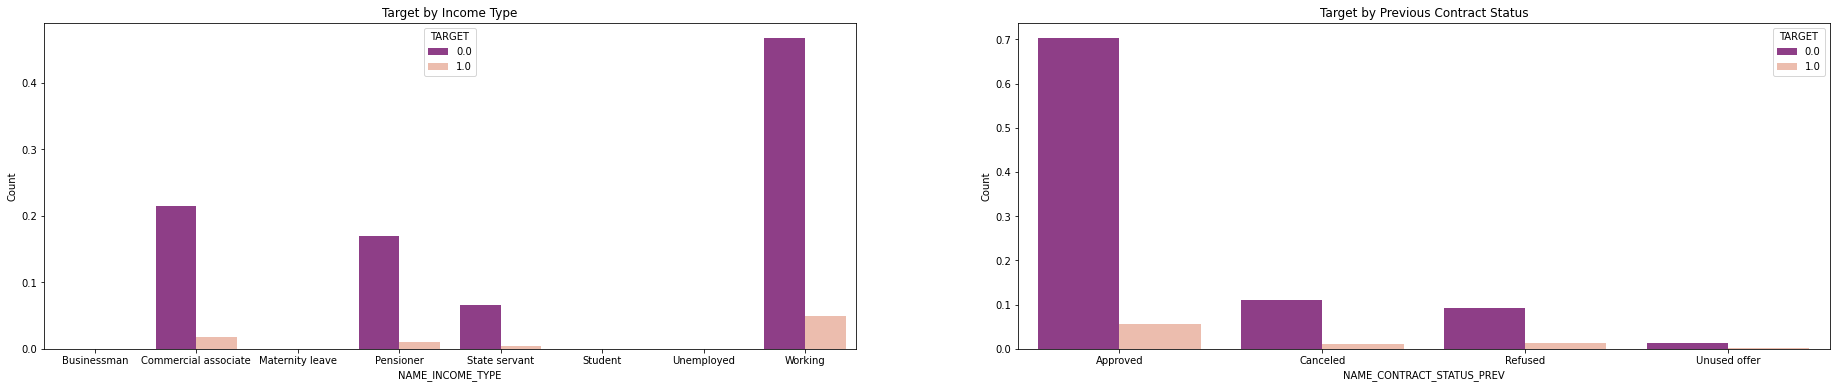

In [93]:
#categorical data visualization
fig, axis = plt.subplots(1, 2, figsize=(32,6))
axis[0].set_title("Target by Income Type")
axis[1].set_title("Target by Previous Contract Status")
axis_y = "Count"

# Plot Income Type
income_type_group = new_train.groupby('NAME_INCOME_TYPE')["TARGET"].value_counts()/len(new_train)
income_type_group = income_type_group.to_frame().rename({"TARGET": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='NAME_INCOME_TYPE', y= axis_y, hue='TARGET', data=income_type_group, palette= ['#9B3192','#F7B7A3'], ax=axis[0])

# Plot Contract Status Previous
contract_status_prev_group = new_train.groupby('NAME_CONTRACT_STATUS_PREV')["TARGET"].value_counts()/len(new_train)
contract_status_prev_group = contract_status_prev_group.to_frame().rename({"TARGET": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='NAME_CONTRACT_STATUS_PREV', y= axis_y, hue='TARGET', data=contract_status_prev_group, palette= ['#9B3192','#F7B7A3'], ax=axis[1])

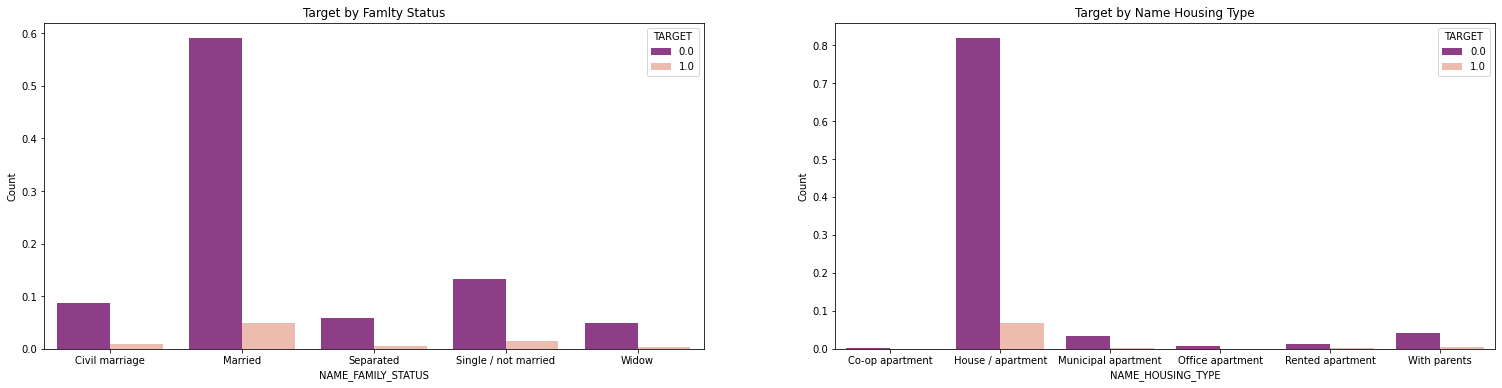

In [94]:
#categorical data visualization
fig, axis = plt.subplots(1, 2, figsize=(26,6))
axis[0].set_title("Target by Famlty Status")
axis[1].set_title("Target by Name Housing Type")
axis_y = "Count"

# Plot Family Status
family_status_group = new_train.groupby('NAME_FAMILY_STATUS')["TARGET"].value_counts()/len(new_train)
family_status_group = family_status_group.to_frame().rename({"TARGET": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='NAME_FAMILY_STATUS', y= axis_y, hue='TARGET', data=family_status_group, palette= ['#9B3192','#F7B7A3'], ax=axis[0])

# Plot Housing Type
housing_type_group = new_train.groupby('NAME_HOUSING_TYPE')["TARGET"].value_counts()/len(new_train)
housing_type_group = housing_type_group.to_frame().rename({"TARGET": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='NAME_HOUSING_TYPE', y= axis_y, hue='TARGET', data=housing_type_group, palette= ['#9B3192','#F7B7A3'], ax=axis[1])

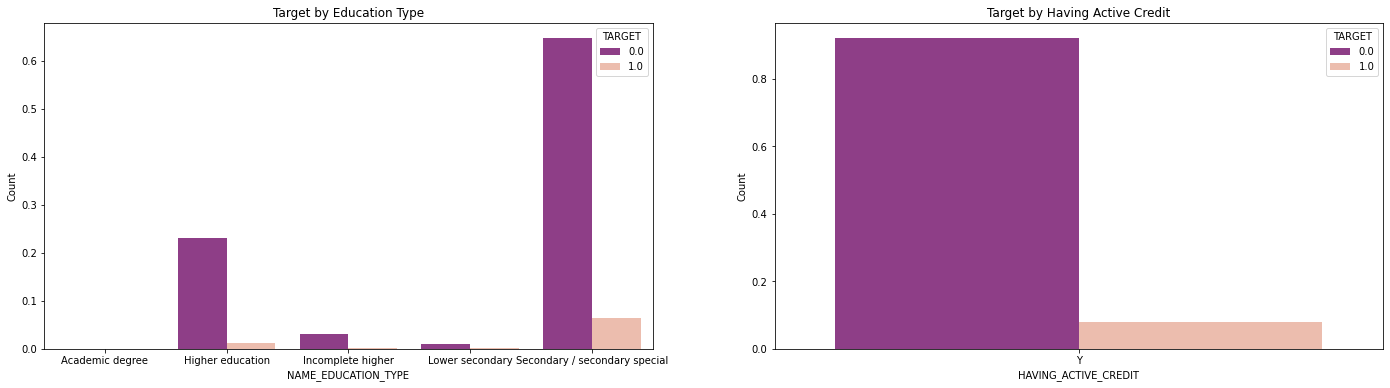

In [95]:
#categorical data visualization
fig, axis = plt.subplots(1, 2, figsize=(24,6))
axis[0].set_title("Target by Education Type")
axis[1].set_title("Target by Having Active Credit")
axis_y = "Count"

# Plot Education Type
education_type_group = new_train.groupby('NAME_EDUCATION_TYPE')["TARGET"].value_counts()/len(new_train)
education_type_group = education_type_group.to_frame().rename({"TARGET": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='NAME_EDUCATION_TYPE', y= axis_y, hue='TARGET', data=education_type_group, palette= ['#9B3192','#F7B7A3'], ax=axis[0])

# Plot Having Active Credit 
having_active_credit_group = new_train.groupby('HAVING_ACTIVE_CREDIT')["TARGET"].value_counts()/len(new_train)
having_active_credit_group = having_active_credit_group.to_frame().rename({"TARGET": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='HAVING_ACTIVE_CREDIT', y= axis_y, hue='TARGET', data=having_active_credit_group, palette= ['#9B3192','#F7B7A3'], ax=axis[1])

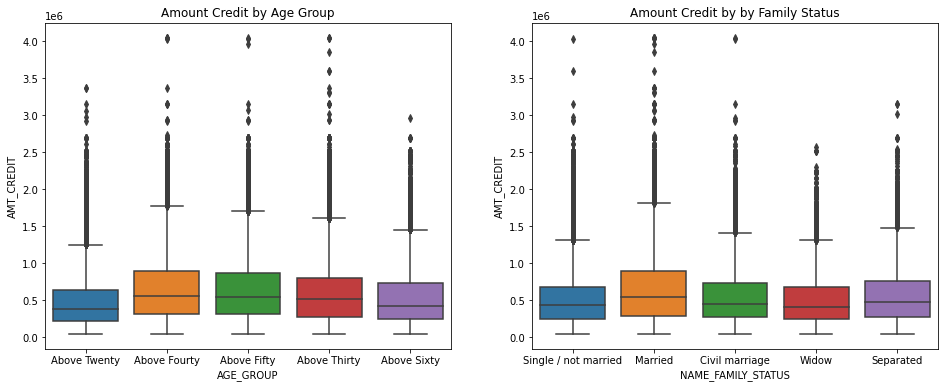

In [96]:
# Plot Amount Credit with Age Group and Family Status
fig, axis = plt.subplots(1, 2, figsize=(16,6))
axis[0].set_title("Amount Credit by Age Group")
axis[1].set_title("Amount Credit by by Family Status")

ax = sns.boxplot(x="AGE_GROUP", y="AMT_CREDIT", data=new_train, ax=axis[0])
ax = sns.boxplot(x="NAME_FAMILY_STATUS", y="AMT_CREDIT", data=new_train, ax=axis[1])

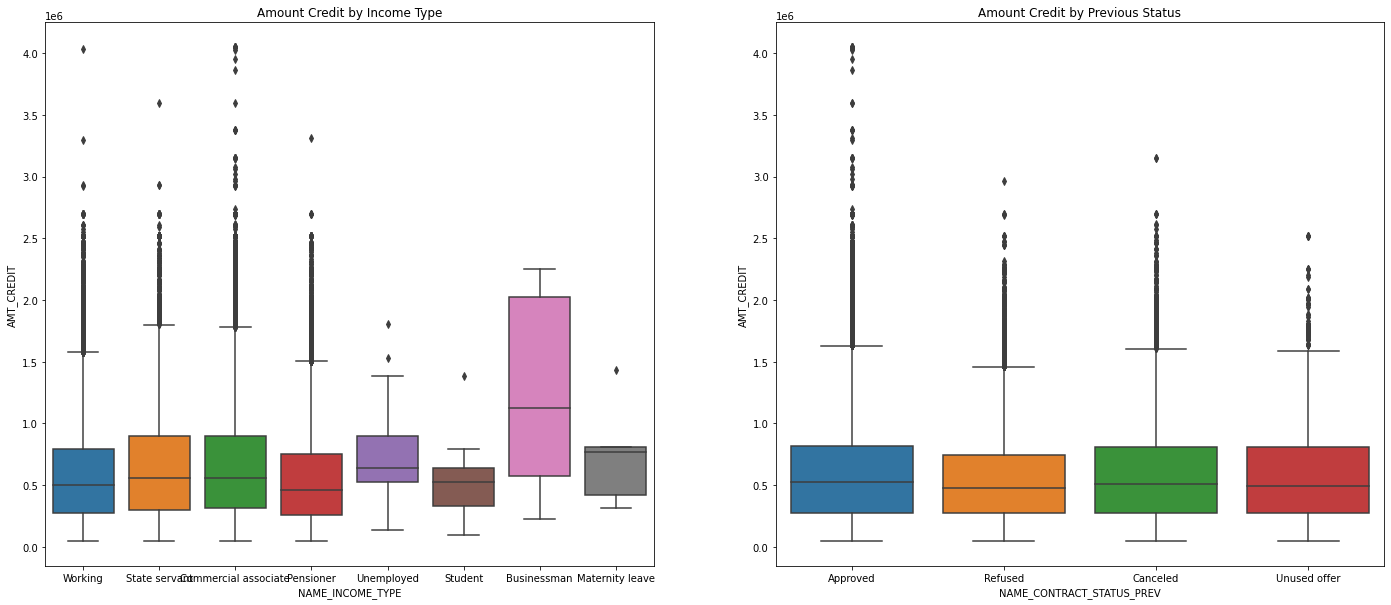

In [97]:
# Plot Amount Credit with Income Type and Previous Status
fig, axis = plt.subplots(1, 2, figsize=(24,10))
axis[0].set_title("Amount Credit by Income Type")
axis[1].set_title("Amount Credit by Previous Status")

ax = sns.boxplot(x="NAME_INCOME_TYPE", y="AMT_CREDIT", data=new_train, ax=axis[0])
ax = sns.boxplot(x="NAME_CONTRACT_STATUS_PREV", y="AMT_CREDIT", data=new_train, ax=axis[1])

In [98]:
# Describe Total Income Based  on Income Type and Target
new_train.groupby(["NAME_INCOME_TYPE", "TARGET"])["AMT_INCOME_TOTAL"].describe()

count           mean            std       min  \
NAME_INCOME_TYPE     TARGET                                                     
Businessman          0.0         10.0  652500.000000  627226.035812  180000.0   
Commercial associate 0.0      66257.0  204147.589265  150664.493313   26550.0   
                     1.0       5360.0  188217.323228  108315.650046   36000.0   
Maternity leave      0.0          3.0  195000.000000  144654.761415   90000.0   
                     1.0          2.0   58500.000000   12727.922061   49500.0   
Pensioner            0.0      52380.0  136449.361318   76851.096032   26100.0   
                     1.0       2982.0  135556.940644   73041.046719   25650.0   
State servant        0.0      20454.0  180655.430487   99705.089126   27000.0   
                     1.0       1249.0  164713.352282  117514.030419   27900.0   
Student              0.0         18.0  170500.000000  106644.682171   81000.0   
Unemployed           0.0         14.0  132557.142857  102257.939051   26550.0   
                     1.0          8.0   72000.000000   34270.978976   31500.0   
Working              0.0     143550.0  163116.124371   94507.343663   25650.0   
                     1.0      15224.0  163676.848266  949988.818178   27000.0   

                                  25%       50%       75%          max  
NAME_INCOME_TYPE     TARGET                                             
Businessman          0.0     225000.0  495000.0  843750.0    2250000.0  
Commercial associate 0.0     135000.0  180000.0  234000.0   18000090.0  
                     1.0     126000.0  157500.0  225000.0    1890000.0  
Maternity leave      0.0     112500.0  135000.0  247500.0     360000.0  
                     1.0      54000.0   58500.0   63000.0      67500.0  
Pensioner            0.0      90000.0  117000.0  166500.0    2250000.0  
                     1.0      90000.0  121500.0  162000.0    1260000.0  
State servant        0.0     112500.0  157500.0  225000.0    2250000.0  
                     1.0     112500.0  148500.0  202500.0    3150000.0  
Student              0.0     112500.0  157500.0  178875.0     562500.0  
Unemployed           0.0      54562.5  101250.0  202500.0     337500.0  
                     1.0      45000.0   65250.0   92250.0     135000.0  
Working              0.0     112500.0  135000.0  202500.0    9000000.0  
                     1.0     112500.0  135000.0  180000.0  117000000.0

In [99]:
# Describe Amount Credit Based  on Income Type and Target
new_train.groupby(["NAME_INCOME_TYPE", "TARGET"])["AMT_CREDIT"].describe()

count          mean            std       min  \
NAME_INCOME_TYPE     TARGET                                                    
Businessman          0.0         10.0  1.228500e+06  788335.271315  225000.0   
Commercial associate 0.0      66257.0  6.749793e+05  444085.379305   45000.0   
                     1.0       5360.0  6.072879e+05  384217.885894   45000.0   
Maternity leave      0.0          3.0  6.300000e+05  273724.313863  315000.0   
                     1.0          2.0  9.292500e+05  715945.615951  423000.0   
Pensioner            0.0      52380.0  5.416641e+05  380018.047960   45000.0   
                     1.0       2982.0  5.580388e+05  349482.470250   45000.0   
State servant        0.0      20454.0  6.731780e+05  447631.237171   45000.0   
                     1.0       1249.0  6.148165e+05  370360.131789   45000.0   
Student              0.0         18.0  5.107875e+05  290152.685950   95940.0   
Unemployed           0.0         14.0  8.431071e+05  474812.277828  135000.0   
                     1.0          8.0  6.266250e+05  276644.143518  328500.0   
Working              0.0     143550.0  5.814100e+05  385556.894049   45000.0   
                     1.0      15224.0  5.355320e+05  326900.253321   45000.0   

                                    25%         50%        75%        max  
NAME_INCOME_TYPE     TARGET                                                
Businessman          0.0     573750.000  1125000.00  2025000.0  2250000.0  
Commercial associate 0.0     314055.000   562981.50   900000.0  4050000.0  
                     1.0     313900.875   526491.00   787131.0  4027680.0  
Maternity leave      0.0     540000.000   765000.00   787500.0   810000.0  
                     1.0     676125.000   929250.00  1182375.0  1435500.0  
Pensioner            0.0     254700.000   454500.00   755190.0  3312162.0  
                     1.0     273636.000   500211.00   755190.0  2173500.0  
State servant        0.0     298512.000   562491.00   904500.0  3600000.0  
                     1.0     315000.000   540000.00   808650.0  2013840.0  
Student              0.0     330923.250   525044.25   637038.0  1381113.0  
Unemployed           0.0     574875.000   787500.00  1035000.0  1804500.0  
                     1.0     478125.000   578250.00   671625.0  1215000.0  
Working              0.0     270000.000   497520.00   808650.0  4031032.5  
                     1.0     281916.000   469152.00   678456.0  2695500.0

In [100]:
gr = new_train.groupby("NAME_INCOME_TYPE")["TARGET"]
income_type_gr = pd.concat([gr.value_counts(),round(gr.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
income_type_gr['Percentage'] = income_type_gr['Percentage'].astype(str) +"%" 
income_type_gr

Counts Percentage
NAME_INCOME_TYPE     TARGET                   
Businessman          0.0         10     100.0%
Commercial associate 0.0      66257     92.52%
                     1.0       5360      7.48%
Maternity leave      0.0          3      60.0%
                     1.0          2      40.0%
Pensioner            0.0      52380     94.61%
                     1.0       2982      5.39%
State servant        0.0      20454     94.25%
                     1.0       1249      5.75%
Student              0.0         18     100.0%
Unemployed           0.0         14     63.64%
                     1.0          8     36.36%
Working              0.0     143550     90.41%
                     1.0      15224      9.59%

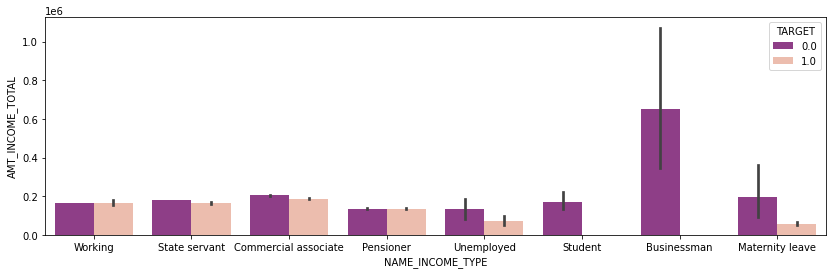

In [ ]:
# Plot Total Income Based on Income Type
plt.figure(figsize=(14,4))
sns.barplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',data=new_train, hue='TARGET', palette= ['#9B3192','#F7B7A3'])   

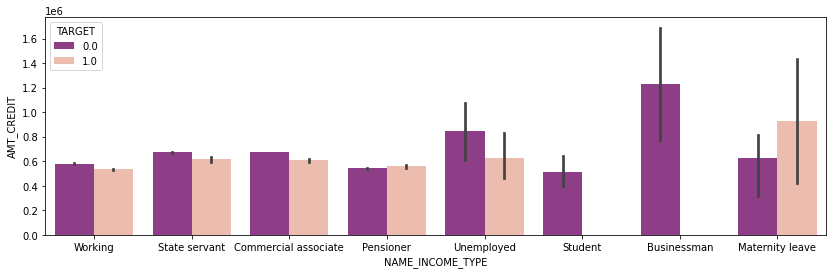

In [ ]:
# Plot Amount Credit Based on Income Type
plt.figure(figsize=(14,4))
sns.barplot(x='NAME_INCOME_TYPE',y='AMT_CREDIT',data=new_train, hue='TARGET', palette= ['#9B3192','#F7B7A3'])   

In [103]:
gr = new_train.groupby("NAME_CONTRACT_STATUS_PREV")["TARGET"]
income_type_gr = pd.concat([gr.value_counts(),round(gr.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
income_type_gr['Percentage'] = income_type_gr['Percentage'].astype(str) +"%" 
income_type_gr

Counts Percentage
NAME_CONTRACT_STATUS_PREV TARGET                   
Approved                  0.0     216033      92.5%
                          1.0      17511       7.5%
Canceled                  0.0      34106     91.48%
                          1.0       3178      8.52%
Refused                   0.0      28619      88.3%
                          1.0       3792      11.7%
Unused offer              0.0       3928     91.95%
                          1.0        344      8.05%

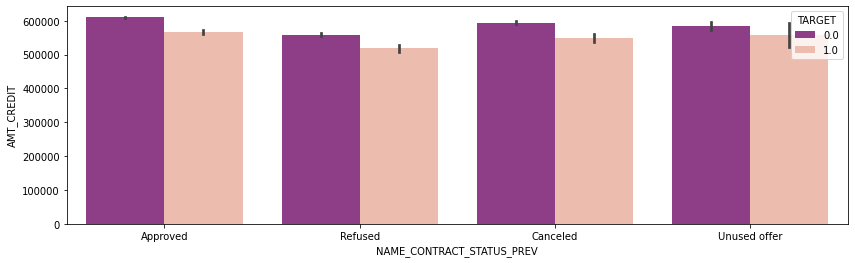

In [104]:
# Plot Amount Credit Based on Previous Contract Status
plt.figure(figsize=(14,4))
sns.barplot(x='NAME_CONTRACT_STATUS_PREV',y='AMT_CREDIT',data=new_train, hue='TARGET', palette= ['#9B3192','#F7B7A3']) 

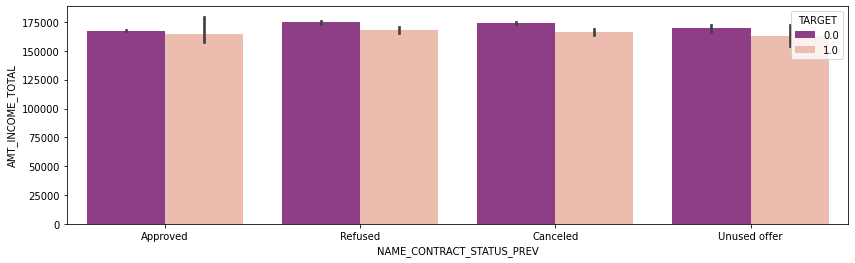

In [102]:
# Plot Amount Credit Based on Previous Contract Status
plt.figure(figsize=(14,4))
sns.barplot(x='NAME_CONTRACT_STATUS_PREV',y='AMT_INCOME_TOTAL',data=new_train, hue='TARGET', palette= ['#9B3192','#F7B7A3']) 

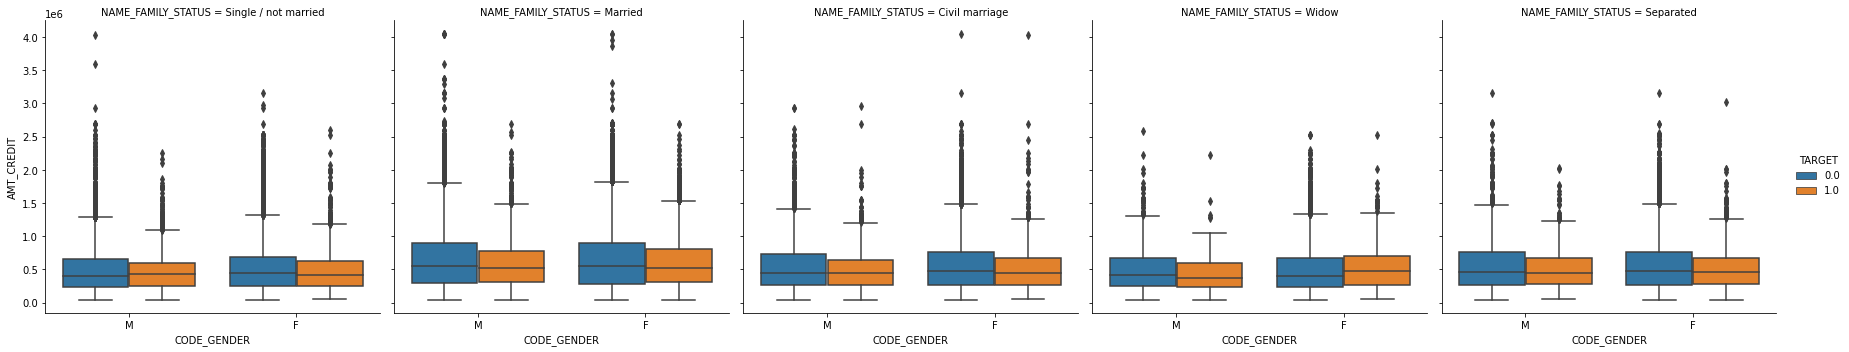

In [ ]:
# Plot the ralationship of target based on code gender and family status 
sns.catplot(x='CODE_GENDER', y='AMT_CREDIT', data=new_train, kind='box', hue='TARGET', col='NAME_FAMILY_STATUS' )

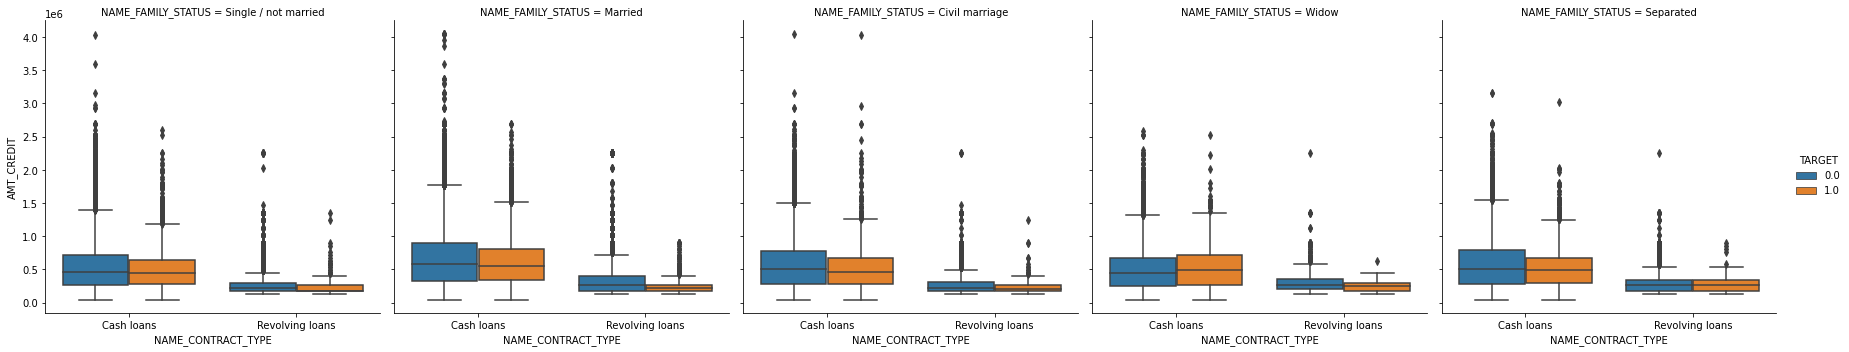

In [ ]:
# Plot the ralationship of target based on name contract type and family status 
sns.catplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=new_train, kind='box', hue='TARGET', col='NAME_FAMILY_STATUS' )

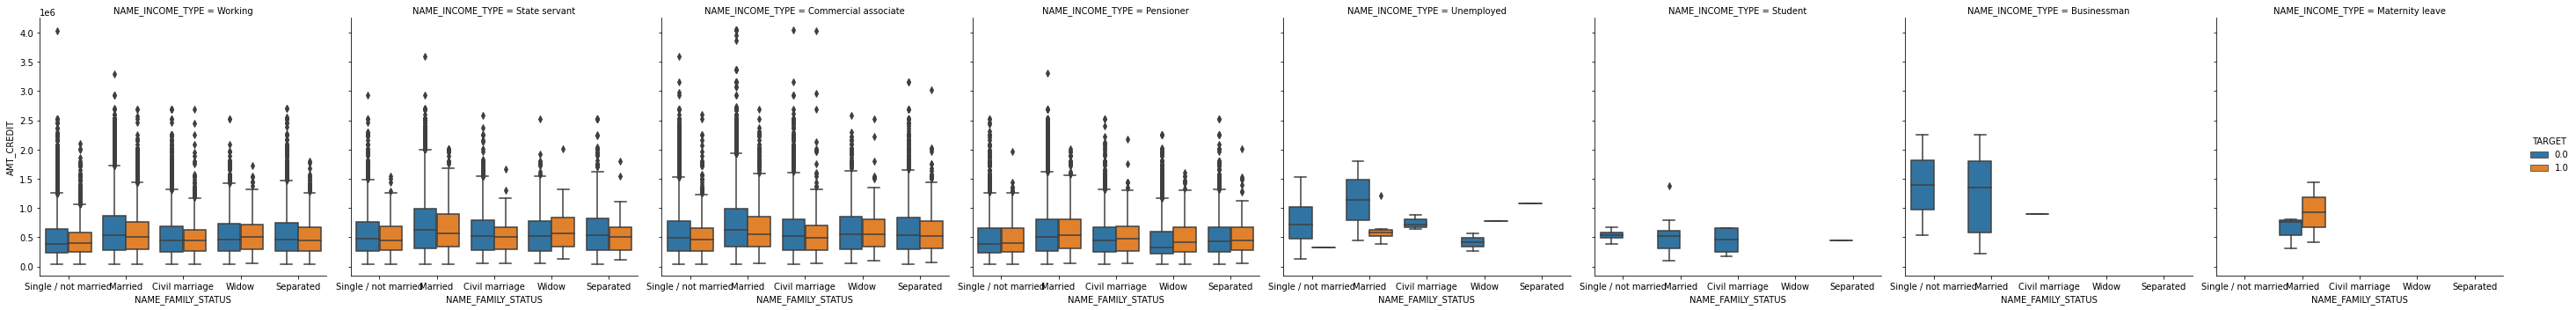

In [ ]:
# Plot the ralationship of target based on income type and family status 
sns.catplot(x='NAME_FAMILY_STATUS', y='AMT_CREDIT', data=new_train, kind='box', hue='TARGET', col='NAME_INCOME_TYPE')

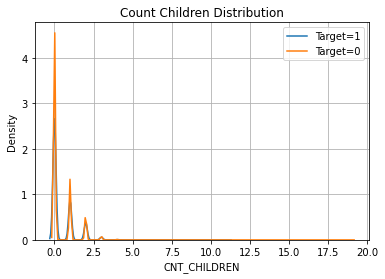

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Count Children Distribution')
plt.xlabel('CNT_CHILDREN')
sns.kdeplot(df[df['TARGET']==1]['CNT_CHILDREN'], label='Target=1')
sns.kdeplot(df[df['TARGET']==0]['CNT_CHILDREN'], label='Target=0')
plt.legend()
plt.grid()
plt.show()

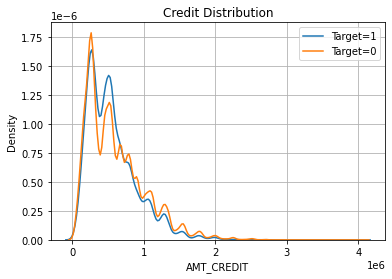

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Credit Distribution')
plt.xlabel('AMT_CREDIT')
sns.kdeplot(df[df['TARGET']==1]['AMT_CREDIT'], label='Target=1')
sns.kdeplot(df[df['TARGET']==0]['AMT_CREDIT'], label='Target=0')
plt.legend()
plt.grid()
plt.show()

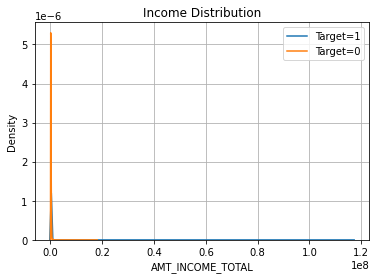

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Income Distribution')
plt.xlabel('AMT_INCOME_TOTAL')
sns.kdeplot(df[df['TARGET']==1]['AMT_INCOME_TOTAL'], label='Target=1')
sns.kdeplot(df[df['TARGET']==0]['AMT_INCOME_TOTAL'], label='Target=0')
plt.legend()
plt.grid()
plt.show()

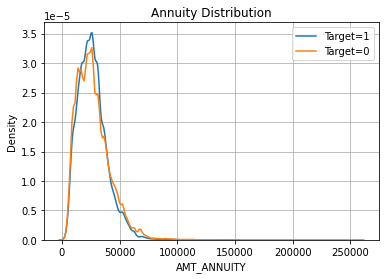

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Annuity Distribution')
plt.xlabel('AMT_ANNUITY')
sns.kdeplot(df[df['TARGET']==1]['AMT_ANNUITY'], label='Target=1')
sns.kdeplot(df[df['TARGET']==0]['AMT_ANNUITY'], label='Target=0')
plt.legend()
plt.grid()
plt.show()

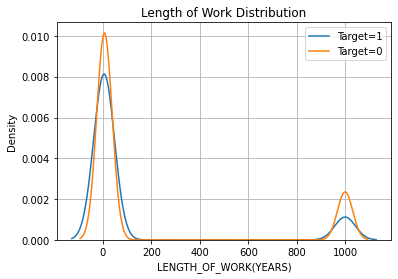

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Length of Work Distribution')
plt.xlabel('LENGTH_OF_WORK(YEARS)')
sns.kdeplot(df[df['TARGET']==1]['LENGTH_OF_WORK(YEARS)'], label='Target=1')
sns.kdeplot(df[df['TARGET']==0]['LENGTH_OF_WORK(YEARS)'], label='Target=0')
plt.legend()
plt.grid()
plt.show()

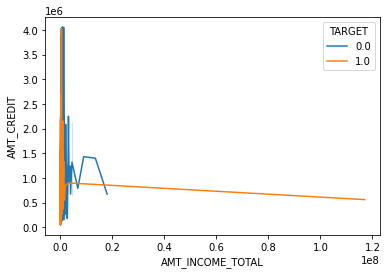

In [ ]:
# Checking the relationship between income total and credit and comparing with loan repayment status
sns.lineplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=new_train,hue="TARGET")

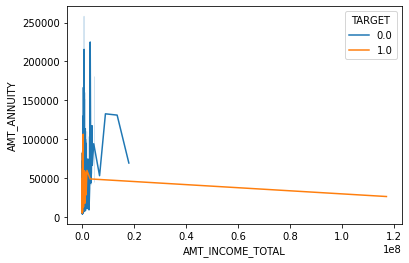

In [ ]:
# Checking the relationship between annuity and credit and comparing with loan repayment status

sns.lineplot(x='AMT_INCOME_TOTAL',y='AMT_ANNUITY',data=new_train,hue="TARGET")

# Features Enginering

### Add New Feature to Dataset

In [ ]:
# Add feature Amount Credit/Total Income
df['CREDIT/INCOME']=df['AMT_CREDIT']/df['AMT_INCOME_TOTAL']

### Transformation to the Features

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,LENGTH_OF_WORK(YEARS),NAME_CONTRACT_STATUS_PREV,HAVING_ACTIVE_CREDIT,AGE_GROUP,CREDIT/INCOME
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.083037,0.262949,0.139376,-1134.0,25.9,1.7,Approved,Y,Above Twenty,2.007889
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.311267,0.622246,0.509350,-828.0,45.9,3.3,Approved,Y,Above Fourty,4.790750
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.501965,0.555912,0.729567,-815.0,52.1,0.6,Approved,Y,Above Fifty,2.000000
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.501965,0.650442,0.509350,-617.0,52.0,8.3,Refused,Y,Above Fifty,2.316167
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.501965,0.322738,0.509350,-1106.0,54.6,8.3,Approved,Y,Above Fifty,4.222222


In [ ]:
transformation_data = MinMaxScaler().fit(df[['AMT_ANNUITY','CNT_CHILDREN','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_WORK_CITY','AMT_INCOME_TOTAL','AMT_CREDIT','LENGTH_OF_WORK(YEARS)','CREDIT/INCOME']])
df[['AMT_ANNUITY','CNT_CHILDREN','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_WORK_CITY','AMT_INCOME_TOTAL','AMT_CREDIT','LENGTH_OF_WORK(YEARS)','CREDIT/INCOME']]=transformation_data.transform(
    df[['AMT_ANNUITY','CNT_CHILDREN','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_WORK_CITY','AMT_INCOME_TOTAL','AMT_CREDIT','LENGTH_OF_WORK(YEARS)','CREDIT/INCOME']])
 
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,LENGTH_OF_WORK(YEARS),NAME_CONTRACT_STATUS_PREV,HAVING_ACTIVE_CREDIT,AGE_GROUP,CREDIT/INCOME
0,100002,1.0,Cash loans,M,N,Y,0.0,0.001512,0.090287,0.090032,...,0.073300,0.307542,0.155054,0.739968,25.9,0.0017,Approved,Y,Above Twenty,0.023640
1,100003,0.0,Cash loans,F,N,N,0.0,0.002089,0.311736,0.132924,...,0.313736,0.727773,0.568211,0.810135,45.9,0.0033,Approved,Y,Above Fourty,0.056483
2,100004,0.0,Revolving loans,M,Y,Y,0.0,0.000358,0.022472,0.020025,...,0.514632,0.650190,0.814130,0.813116,52.1,0.0006,Approved,Y,Above Fifty,0.023547
3,100006,0.0,Cash loans,F,N,Y,0.0,0.000935,0.066837,0.109477,...,0.514632,0.760751,0.568211,0.858519,52.0,0.0083,Refused,Y,Above Fifty,0.027278
4,100007,0.0,Cash loans,M,N,Y,0.0,0.000819,0.116854,0.078975,...,0.514632,0.377472,0.568211,0.746388,54.6,0.0083,Approved,Y,Above Fifty,0.049774


### Label Encoding

In [ ]:
# Ubah kedalam bentuk numerik
kategori = ['CODE_GENDER','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS_PREV','HAVING_ACTIVE_CREDIT','AGE_GROUP']

encoded_data = LabelEncoder()

for feature in kategori:
        if feature in df.columns.values:
            df[feature] = encoded_data.fit_transform(df[feature])

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,LENGTH_OF_WORK(YEARS),NAME_CONTRACT_STATUS_PREV,HAVING_ACTIVE_CREDIT,AGE_GROUP,CREDIT/INCOME
0,100002,1.0,0,1,0,1,0.0,0.001512,0.090287,0.090032,...,0.073300,0.307542,0.155054,0.739968,25.9,0.0017,0,0,4,0.023640
1,100003,0.0,0,0,0,0,0.0,0.002089,0.311736,0.132924,...,0.313736,0.727773,0.568211,0.810135,45.9,0.0033,0,0,1,0.056483
2,100004,0.0,1,1,1,1,0.0,0.000358,0.022472,0.020025,...,0.514632,0.650190,0.814130,0.813116,52.1,0.0006,0,0,0,0.023547
3,100006,0.0,0,0,0,1,0.0,0.000935,0.066837,0.109477,...,0.514632,0.760751,0.568211,0.858519,52.0,0.0083,2,0,0,0.027278
4,100007,0.0,0,1,0,1,0.0,0.000819,0.116854,0.078975,...,0.514632,0.377472,0.568211,0.746388,54.6,0.0083,0,0,0,0.049774


### Correlation Matrix

In [ ]:
df.drop('SK_ID_CURR', axis=1, inplace=True)

In [ ]:
# Split data into train and test data
new_train = df.iloc[:307511]
print('Size of train data:', new_train.shape)
new_test = df.iloc[307511:]
print('Size of test data:', new_test.shape)

Size of train data: (307511, 27)
Size of test data: (48744, 27)


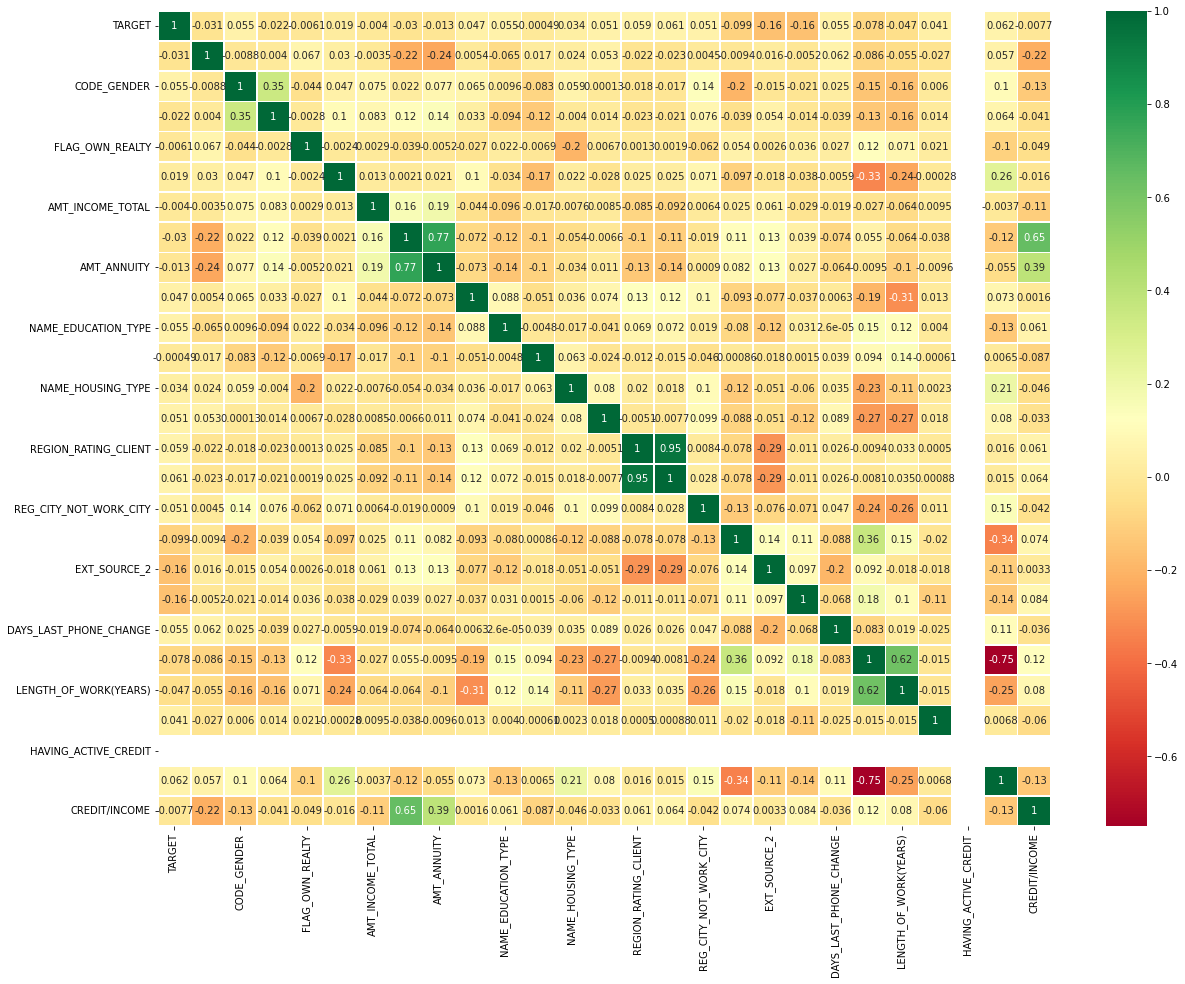

In [ ]:
corr = new_train.corr()
sns.heatmap(corr, linewidths=.5, annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

#  Modeling and Evaluation

In [ ]:
# define features and target data
X = new_train.drop(columns=['TARGET'], axis=1)
y = new_train['TARGET']

In [ ]:
X.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AGE',
       'LENGTH_OF_WORK(YEARS)', 'NAME_CONTRACT_STATUS_PREV',
       'HAVING_ACTIVE_CREDIT', 'AGE_GROUP', 'CREDIT/INCOME'],
      dtype='object')

### SMOTE Method

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

In [ ]:
X = pd.DataFrame(X)
X.column = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'LENGTH_OF_WORK(YEARS)', 'NAME_CONTRACT_STATUS_PREV',
       'HAVING_ACTIVE_CREDIT', 'AGE_GROUP', 'CREDIT/INCOME']
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,LENGTH_OF_WORK(YEARS),NAME_CONTRACT_STATUS_PREV,HAVING_ACTIVE_CREDIT,AGE_GROUP,CREDIT/INCOME
0,0,1,0,1,0.000000,0.001512,0.090287,0.090032,7,4,...,0.073300,0.307542,0.155054,0.739968,25.900000,0.001700,0,0,4,0.023640
1,0,0,0,0,0.000000,0.002089,0.311736,0.132924,4,1,...,0.313736,0.727773,0.568211,0.810135,45.900000,0.003300,0,0,1,0.056483
2,1,1,1,1,0.000000,0.000358,0.022472,0.020025,7,4,...,0.514632,0.650190,0.814130,0.813116,52.100000,0.000600,0,0,0,0.023547
3,0,0,0,1,0.000000,0.000935,0.066837,0.109477,7,4,...,0.514632,0.760751,0.568211,0.858519,52.000000,0.008300,2,0,0,0.027278
4,0,1,0,1,0.000000,0.000819,0.116854,0.078975,7,4,...,0.514632,0.377472,0.568211,0.746388,54.600000,0.008300,0,0,0,0.049774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565367,0,0,0,1,0.046795,0.000508,0.057851,0.063660,7,4,...,0.514632,0.355376,0.523208,0.813317,31.646795,0.003917,0,0,3,0.037346
565368,0,0,0,1,0.000000,0.000465,0.080945,0.067164,4,4,...,0.610347,0.266794,0.742089,0.398717,47.857117,0.005572,0,0,1,0.049551
565369,0,0,0,0,0.008126,0.000439,0.056966,0.048008,7,4,...,0.223717,0.748953,0.511734,0.828292,26.367496,0.004221,0,0,4,0.040825
565370,0,0,1,1,0.000000,0.001089,0.238029,0.157388,1,1,...,0.554201,0.796970,0.568245,0.535904,50.926656,0.007540,0,0,0,0.081727


In [ ]:
y = pd.DataFrame(y)
y.columns = ['TARGET']
y

,TARGET
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
565367,1.0
565368,1.0
565369,1.0
565370,1.0


### Train Test Split

In [ ]:
# Split train and test data 70:30
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X size : ", X.shape)
print("y size : ", y.shape)
print("x Train : ", len(x_train))
print("y Train : ", len(y_train))
print("x Test : ", len(x_test))
print("t Test : ", len(y_test))  

X size :  (565372, 26)
y size :  (565372, 1)
x Train :  395760
y Train :  395760
x Test :  169612
t Test :  169612


### Model Classifier

In [ ]:
# build classify function
def classifier(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)
    print("Training Accuracy is", model.score(x_train, y_train)*100)
    print("Testing Accuracy is", model.score(x_test, y_test)*100)
    # cross validation cv=5
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

### Logistic Regression

In [ ]:
LR = LogisticRegression(solver='lbfgs', max_iter=3000)
classifier(LR, X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy is 69.0893470790378
Testing Accuracy is 68.81647524939272


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross validation is 68.98856077967267


In [ ]:
predicted = LR.predict(x_test)
expected = y_test

#  Printing the Report
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69     84845
         1.0       0.69      0.69      0.69     84767

    accuracy                           0.69    169612
   macro avg       0.69      0.69      0.69    169612
weighted avg       0.69      0.69      0.69    169612



In [ ]:
print(metrics.confusion_matrix(expected, predicted))

[[57993 26852]
 [26039 58728]]


### Decision Tree  Clasifier

In [ ]:
DecTree = DecisionTreeClassifier()
classifier(DecTree, X, y)

Training Accuracy is 100.0
Testing Accuracy is 83.71990189373393
Cross validation is 84.02539567171503


In [ ]:
predicted = DecTree.predict(x_test)
expected = y_test

#  Printing the Report
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83     84845
         1.0       0.83      0.85      0.84     84767

    accuracy                           0.84    169612
   macro avg       0.84      0.84      0.84    169612
weighted avg       0.84      0.84      0.84    169612



In [ ]:
print(metrics.confusion_matrix(expected, predicted))

[[69583 15262]
 [12351 72416]]


### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()
classifier(rfc, X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training Accuracy is 100.0
Testing Accuracy is 91.75235242789425


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Cross validation is 91.95539972608218


In [ ]:
predicted = rfc.predict(x_test)
expected = y_test

#  Printing the Report
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92     84845
         1.0       0.94      0.89      0.92     84767

    accuracy                           0.92    169612
   macro avg       0.92      0.92      0.92    169612
weighted avg       0.92      0.92      0.92    169612



In [ ]:
print(metrics.confusion_matrix(expected, predicted))

[[79874  4971]
 [ 9018 75749]]


# Hyperparameter Tuning

In [ ]:
# Define parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

In [ ]:
rfc_model = RandomForestClassifier()

### GridSearchCV

In [ ]:
# Build the gridsearchCV
gs = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv = 5)
gs_results = gs.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
# Summarize the results in a readable format
print("Best: {0}, using {1}".format(gs_results.cv_results_['mean_test_score'], gs_results.best_params_))
results_df = pd.DataFrame(gs_results.cv_results_)
results_df

Best: [0.71793006 0.7130281  0.71653022 0.79328886 0.7942263  0.79438549
 0.8537548  0.85488427 0.85470487], using {'max_depth': 16, 'n_estimators': 128}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.277431,0.603321,0.314758,0.037230,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.718440,0.712174,0.720879,0.723860,0.714297,0.717930,0.004253,7
1,28.389084,2.283285,0.589715,0.038919,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.715156,0.711820,0.709508,0.718946,0.709710,0.713028,0.003589,9
2,51.295208,0.813668,1.121220,0.010981,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.715219,0.715345,0.723696,0.708093,0.720298,0.716530,0.005289,8
3,42.092723,1.854728,0.598436,0.140616,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.788483,0.792892,0.796493,0.793675,0.794901,0.793289,0.002693,6
4,88.547787,6.073617,1.387195,0.562995,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.794130,0.792867,0.792324,0.794749,0.797061,0.794226,0.001661,5
5,165.809535,4.785635,2.033615,0.011420,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.794080,0.796556,0.792652,0.793486,0.795154,0.794385,0.001357,4
6,67.451318,0.456114,1.172137,0.005431,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.855569,0.852929,0.852865,0.854798,0.852613,0.853755,0.001197,3
7,134.001512,1.899660,2.303638,0.012091,16,128,"{'max_depth': 16, 'n_estimators': 128}",0.855493,0.854419,0.854558,0.854659,0.855291,0.854884,0.000426,1
8,273.842522,1.986061,4.641065,0.080447,16,256,"{'max_depth': 16, 'n_estimators': 256}",0.855898,0.854331,0.853510,0.854798,0.854988,0.854705,0.000785,2


In [ ]:
# Getting the best hyperparameters
print('Config : %s' % gs_results.best_params_)

Config : {'max_depth': 16, 'n_estimators': 128}


In [ ]:
# Gettting the mean accuracy
print('Mean Accuracy : %.3f' % gs_results.best_score_)
print('Accuracy :', gs_results.score(x_test,y_test)*100)

Mean Accuracy : 0.855
Accuracy : 85.49984670895927


In [ ]:
# Extract the best decision forest 
best_clf = gs_results.best_estimator_
y_pred = best_clf.predict(x_test)

([<matplotlib.axis.XTick at 0x7f4a4425d4d0>,
 [Text(0.5, 0, 'False'), Text(1.5, 0, 'True')])

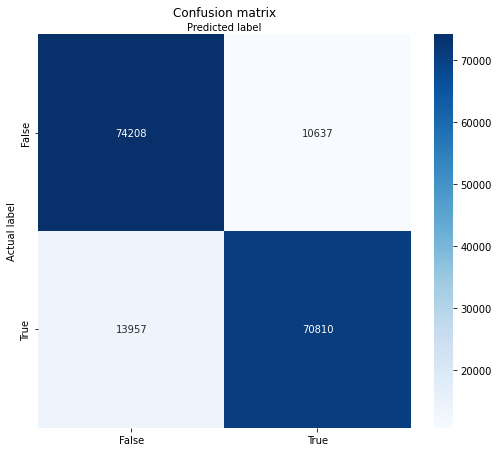

In [ ]:
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create heatmap from the confusion matrix
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
tick_marks = [0.5, 1.5]
plt.title('Confusion matrix')
plt.ylabel('Actual label'); plt.xlabel('Predicted label')
plt.yticks(tick_marks, class_names); plt.xticks(tick_marks, class_names)


# Predict Test Data

In [ ]:
new_test= new_test.drop(columns=['TARGET'], axis=1)

In [ ]:
predict_test = best_clf.predict(new_test)

In [ ]:
# Prepare Submission File
df_test = pd.DataFrame(data=predict_test, columns=['TARGET'])
ss_pred =  pd.concat([df_ss['SK_ID_CURR'],df_test], axis=1)

In [ ]:
ss_pred.to_csv('ss_predict.csv', index=False, encoding='utf-8-sig')
files.download('ss_predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
ss_data = pd.read_csv('/content/ss_predict.csv')
ss_data.head()

,SK_ID_CURR,TARGET
0,100001,0.0
1,100005,0.0
2,100013,0.0
3,100028,0.0
4,100038,0.0


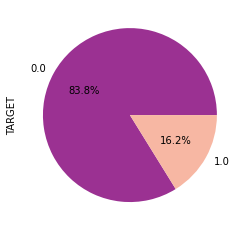

In [106]:
# The ratio of label/class
mycolors=['#9B3192','#F7B7A3']
ss_data['TARGET'].value_counts().plot.pie(autopct='%1.1f%%',colors=mycolors)
plt.show()